In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import time
import torch
import numpy as np

import datasets
import models
import utils

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio

In [5]:
torch.cuda.empty_cache()
x = torch.rand(5000, 5000)
x = x.to('cuda:0')

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [2]:
resample_rate = 8000
#dataset = datasets.ESC50Dataset(source_dir='../data/esc50/', resample_rate=resample_rate)
dataset = datasets.AudioMNISTDataset(source_dir='../data/audio-mnist/')

1443
min length:  5500
max length:  5500
mean:  5500.0
std:  0.0


<AxesSubplot:ylabel='Count'>

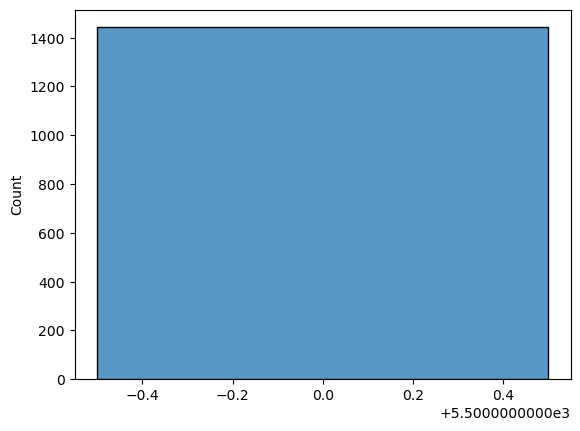

In [3]:
ls = np.array([len(x) for x in dataset.xs])

print(len(ls))

print("min length: ", np.min(ls))
print("max length: ", np.max(ls))
print("mean: ", np.mean(ls))
print("std: ", np.std(ls))

sns.histplot(ls)

idx:  70
Target:  0
Segment length:  5500
window size:  tensor(200.)
hop length:  80
total time spectrogram:  0.001615285873413086
total time Mel spectrogram:  0.0034673213958740234
Spectrogram shape:  torch.Size([5501, 69])
Mel spectrogram shape:  torch.Size([128, 69])


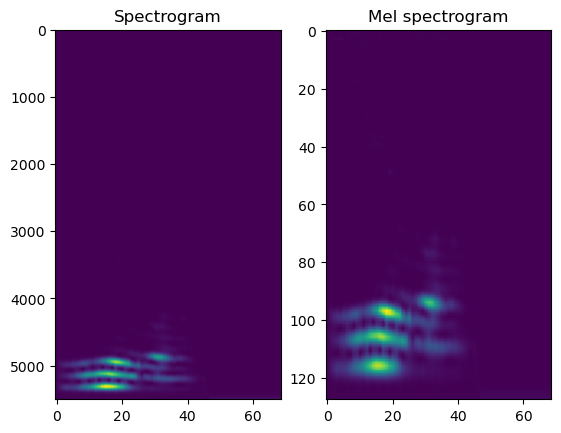

In [14]:
n_mels = 128

idx = np.random.randint(len(dataset))
idx = 70
print("idx: ", idx)
x, y = dataset[idx]

n_points = len(x)


#print("Category: ", dataset.categories[idx])
print("Target: ", y)
print("Segment length: ", len(x))

xt = torch.from_numpy(x)
xt = torch.unsqueeze(xt, dim=0)

window_time = 0.025
lambd = torch.tensor(dataset.sample_rate*window_time) / 6
print("window size: ", lambd*6)

hop_length = int(dataset.sample_rate * 0.01)
print("hop length: ", hop_length)

mel_spectrogram_layer = models.MelSpectrogramLayer(lambd, n_mels, n_points=n_points, sample_rate=dataset.sample_rate, f_min=0, f_max=None,
                                                   hop_length=hop_length, device="cpu", optimized=False)

spectrogram_layer = models.SpectrogramLayer(lambd, device="cpu", optimized=False, size=(None, None), hop_length=hop_length)

# t1 = time.time()
# s1 = spectrogram_layer(xt)
# print("total time: ", t2-t1)
# s1 = s1[0,0]

t1 = time.time()
s2 = spectrogram_layer(xt[:,:n_points])
t2 = time.time()
print("total time spectrogram: ", t2-t1)
s2 = s2[0,0]

t1 = time.time()
mel_s2 = mel_spectrogram_layer(xt[:, :n_points])
t2 = time.time()
print("total time Mel spectrogram: ", t2-t1)
mel_s2 = mel_s2[0, 0]

print("Spectrogram shape: ", s2.shape)
print("Mel spectrogram shape: ", mel_s2.shape)
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.log(np.flip(s2.detach().numpy(), axis=0) + 1), aspect='auto')
ax[0].set_title("Spectrogram")
ax[1].imshow(np.log(np.flip(mel_s2.detach().numpy(), axis=0) + 1), aspect='auto')
ax[1].set_title("Mel spectrogram")
plt.show()
Audio(x, rate=dataset.sample_rate)

In [15]:
len(dataset)

1443